# Preamble

Assignment for week 1: [Which p-values can you expect?](https://d3c33hcgiwev3.cloudfront.net/_122e44c5c658d76af09f193f785664d6_1.1-Which-p-values-can-you-expect.pdf?Expires=1596153600&Signature=UoCvO-pFNMP1xOgPryP0y9dSZeVuL-ie89yLqGpwyJ4Oq6EB6Vg2Bs~yPW5EJ3jh7fHq5o4L6jyJDSgsm1~E-eHQZ5T0Ss70KZzYtoP5pBj8FlQgWWwJovH4WhkED6dsfOpxreYU0JigMs0154PrkWfXlPh0V45BbSHoKQePvfc_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A): 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, '/home/src')
sys.path

['/home/src',
 '/home/notebooks',
 '/usr/local/lib/python37.zip',
 '/usr/local/lib/python3.7',
 '/usr/local/lib/python3.7/lib-dynload',
 '',
 '/usr/local/lib/python3.7/site-packages',
 '/usr/local/lib/python3.7/site-packages/IPython/extensions',
 '/root/.ipython']

In [3]:
import numpy as np
from scipy.stats import ttest_1samp
import matplotlib.pyplot as plt

from statistical_tests import two_tailed_t_test
from simulations import simulate_normal

## Validation

In [4]:
samples = simulate_normal(106, 15, 26, 2)
samples

array([[130.58615345, 117.11034258],
       [117.42956904,  95.68096829],
       [ 86.90659856,  97.08090275],
       [ 86.36839101, 100.02012584],
       [137.38827382, 114.96218888],
       [ 80.58960498, 108.22831919],
       [133.18674978, 100.92486336],
       [112.68996745, 115.30824622],
       [100.20025617,  92.03890182],
       [101.18719761, 106.48053414],
       [100.76808414,  83.49523166],
       [ 91.27472465, 103.8653186 ],
       [122.00230017, 109.17071696],
       [ 67.4790735 , 103.24922726],
       [100.72404284, 103.20285535],
       [ 78.87772902, 109.85358834],
       [100.82449346, 129.41527728],
       [108.40402209, 106.7780485 ],
       [105.81642753, 105.15686022],
       [117.00518086, 121.01628308],
       [119.51254718,  90.65144752],
       [112.18852419, 101.36317433],
       [116.55387881, 124.69732462],
       [128.78726434, 115.08228214],
       [ 95.32631408, 105.45051089],
       [124.10245653,  98.8240603 ]])

In [5]:
two_tailed_t_test(samples, 100.)

(array([1.91535111, 2.94581109]), array([0.06695424, 0.00687513]))

In [6]:
ttest_1samp(samples, 100.)

Ttest_1sampResult(statistic=array([1.91535111, 2.94581109]), pvalue=array([0.06695424, 0.00687513]))

# Question 1

With n=26, we obtain a power of 50.1%


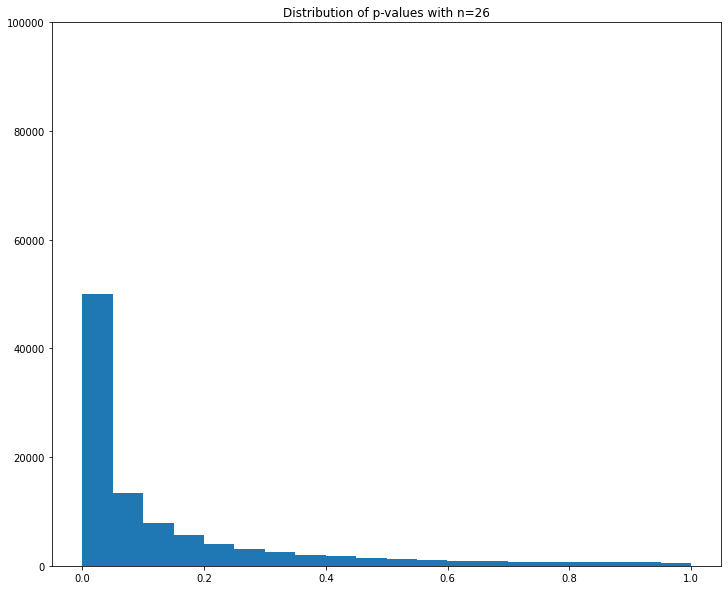

In [7]:
# Parameters:
sample_mean = 106 # mean IQ of our sample
sample_std = 15 # std deviation within our sample
sample_size = 26 # samples size
number_simulations = 100000
H0 = 100.

# Generate samples
samples = simulate_normal(sample_mean, sample_std, sample_size, number_simulations)

# Calculate the p-values for each sample
t_values, p_values = two_tailed_t_test(samples, H0)

# Plot the results
fig, ax = plt.subplots(1,1,figsize=(12,10))
distr,_,_ = ax.hist(p_values, bins=20)
ax.set_ylim(0, number_simulations)
ax.set_title(f'Distribution of p-values with n={sample_size}')

# Calculate the power from these results
power = distr[0] / number_simulations
print(f"With n={sample_size}, we obtain a power of {100*power:.1f}%")

# Question 2

With n=51, we obtain a power of 79.8%


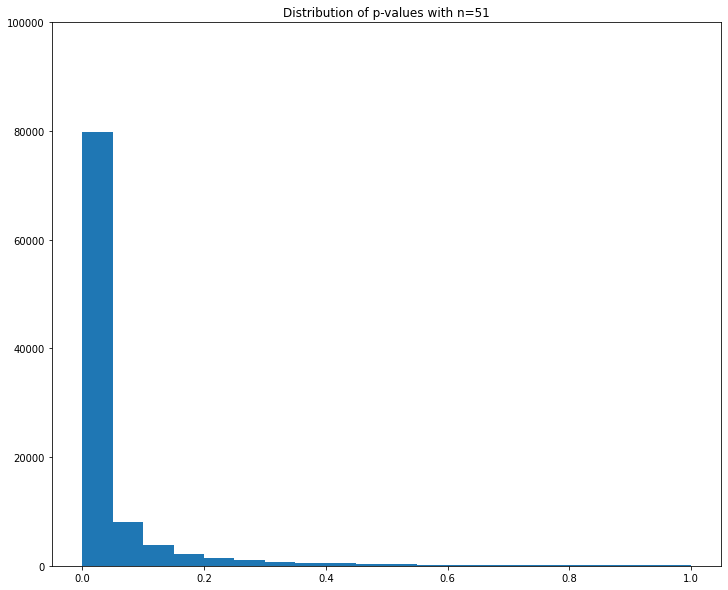

In [8]:
# Parameters:
sample_size = 51 # samples size

# Generate samples
samples = simulate_normal(sample_mean, sample_std, sample_size, number_simulations)

# Calculate the p-values for each sample
t_values, p_values = two_tailed_t_test(samples, H0)

# Plot the results
fig, ax = plt.subplots(1,1,figsize=(12,10))
distr,_,_ = ax.hist(p_values, bins=20)
ax.set_ylim(0, number_simulations)
ax.set_title(f'Distribution of p-values with n={sample_size}')

# Calculate the power from these results
power = distr[0] / number_simulations
print(f"With n={sample_size}, we obtain a power of {100*power:.1f}%")

# Question 3

Much steeper with a larger sample size

# Question 4

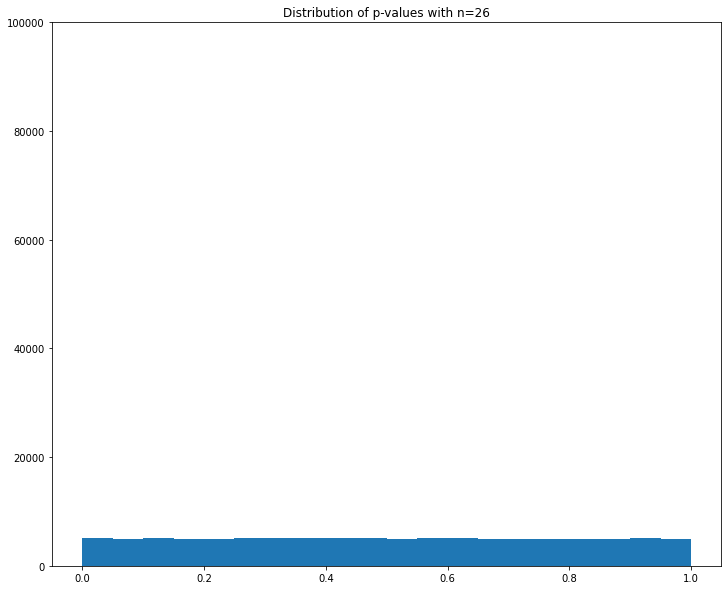

In [9]:
# Parameters:
sample_mean = H0 # mean IQ of our sample
sample_size = 26 # samples size

# Generate samples
samples = simulate_normal(sample_mean, sample_std, sample_size, number_simulations)

# Calculate the p-values for each sample
t_values, p_values = two_tailed_t_test(samples, H0)

# Plot the results
fig, ax = plt.subplots(1,1,figsize=(12,10))
distr,_,_ = ax.hist(p_values, bins=20)
ax.set_ylim(0, number_simulations)
ax.set_title(f'Distribution of p-values with n={sample_size}');

When there is no true effect, the p-value is uniformly distributed

# Question 5

With no true effect, the type-1 error is 5.1%


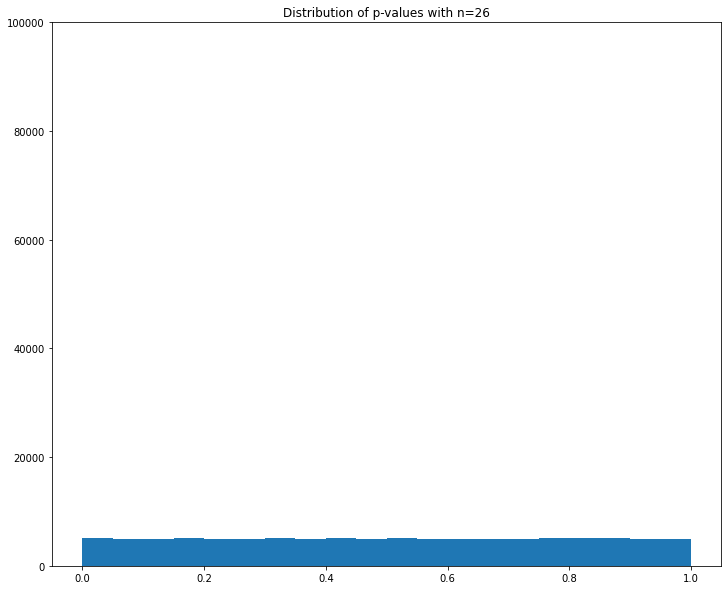

In [10]:
# Parameters:

# Generate samples
samples = simulate_normal(sample_mean, sample_std, sample_size, number_simulations)

# Calculate the p-values for each sample
t_values, p_values = two_tailed_t_test(samples, H0)

# Plot the results
fig, ax = plt.subplots(1,1,figsize=(12,10))
distr,_,_ = ax.hist(p_values, bins=20)
ax.set_ylim(0, number_simulations)
ax.set_title(f'Distribution of p-values with n={sample_size}');

# When there is no true effect, the left-most bar is the probability that we wrongly reject the null, i.e., 
# probability of a False Positive (or type-1 error)
power = distr[0] / number_simulations
print(f"With no true effect, the type-1 error is {100*power:.1f}%")

# Question 6

With n=51, we obtain a power of 90.3% at the 5% significance level
With n=51, we obtain a power of 74.1% at the 1% significance level


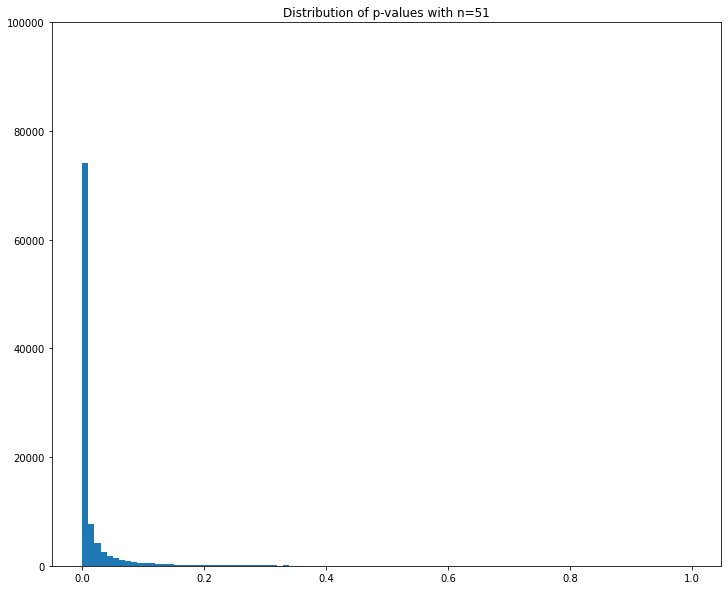

In [11]:
# Parameters:
sample_mean = 107 # mean IQ of our sample
sample_std = 15 # std deviation within our sample
sample_size = 51 # samples size
number_simulations = 100000
H0 = 100.

# Generate samples
samples = simulate_normal(sample_mean, sample_std, sample_size, number_simulations)

# Calculate the p-values for each sample
t_values, p_values = two_tailed_t_test(samples, H0)

# Plot the results
fig, ax = plt.subplots(1,1,figsize=(12,10))
distr,_,_ = ax.hist(p_values, bins=100)
ax.set_ylim(0, number_simulations)
ax.set_title(f'Distribution of p-values with n={sample_size}')

# Calculate the power from these results
power5 = np.sum(distr[:5]) / number_simulations
print(f"With n={sample_size}, we obtain a power of {100*power5:.1f}% at the 5% significance level")
power1 = np.sum(distr[0]) / number_simulations
print(f"With n={sample_size}, we obtain a power of {100*power1:.1f}% at the 1% significance level")

# Question 7

# Question 8

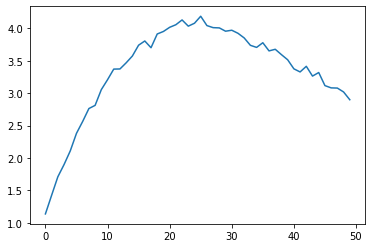

In [12]:
# Parameters:
sample_mean = 106 # mean IQ of our sample
sample_std = 15 # std deviation within our sample
number_simulations = 100000
H0 = 100.

samples_sizes = np.linspace(2, 51, 50, dtype=int)
p_values_45 = []
for sample_size in samples_sizes:
    # Generate samples
    samples = simulate_normal(sample_mean, sample_std, sample_size, number_simulations)
    # Calculate the p-values for each sample
    t_values, p_values = two_tailed_t_test(samples, H0)
    # Count percentage of p-value in the interval [0.04, 0.05]
    pct = ((p_values >= 0.04) & (p_values < 0.05)).sum() / number_simulations * 100
    p_values_45.append(pct)

# Plot results
plt.plot(p_values_45)